In [12]:
import matplotlib.pyplot as plt
import json, sys, random
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import normalize

In [2]:
f = open('./ships-in-satellite-imagery/shipsnet.json')
dataset = json.load(f)
f.close()

dataset.keys()

dict_keys(['data', 'labels', 'locations', 'scene_ids'])

In [15]:
#Filtering out images and labels from JSON object
x = np.array(dataset['data']).astype('uint8')
y = np.array(dataset['labels']).astype('uint8')

print(x.shape)

# shuffle all indexes
indexes = np.arange(4000)
np.random.shuffle(indexes)

#Shuffling Images and Labels by same shuffled index
x = x[indexes]
y = y[indexes]

#Normalization
x = x/255.0

#Mapping labels with output classes
classes = {0: 'Not a Ship',
           1: 'Ship'}


(4000, 19200)


In [16]:
#Spilting data into training and testing set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
print(x_train.shape)

(3200, 19200)


In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools  


# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

dict_characters = {0: 'No Ship', 1: 'Ship'}

Accuracy Score for Ships in Satellite Imagery is 88.875
Evaluation Result

             precision    recall  f1-score   support

          0       0.96      0.89      0.92       599
          1       0.73      0.88      0.80       201

avg / total       0.90      0.89      0.89       800



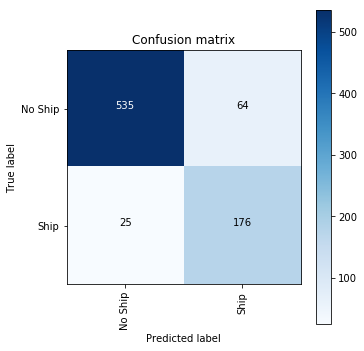

In [18]:
# Use svc in SVM package to perform this classification task
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

# Make a prediction
y_pred = svclassifier.predict(x_test)

# Accuracy
print('Accuracy Score for Ships in Satellite Imagery is {}'.format(accuracy_score(y_test, y_pred)*100))

# Evaluation Result
# Confusion matrix, precision, recall, and F1 measures are used metrics for evaluation of classification tasks.
print("Evaluation Result\n")
print(classification_report(y_test,y_pred))

# Plot normalized confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values()))

plt.show()

Accuracy Score for Ships in Satellite Imagery is 88.875
Evaluation Result

             precision    recall  f1-score   support

          0       0.96      0.89      0.92       599
          1       0.73      0.88      0.80       201

avg / total       0.90      0.89      0.89       800



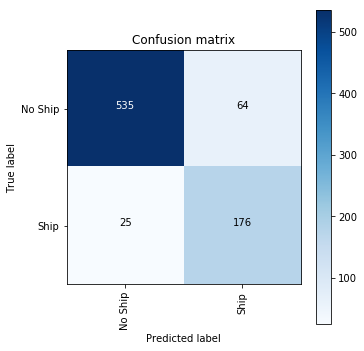

In [19]:
from sklearn.svm import LinearSVC

LSVM_model = LinearSVC().fit(x_train, y_train)

# Make a prediction
y_pred = svclassifier.predict(x_test)

# Accuracy
print('Accuracy Score for Ships in Satellite Imagery is {}'.format(accuracy_score(y_test, y_pred)*100))

# Evaluation Result
# Confusion matrix, precision, recall, and F1 measures are used metrics for evaluation of classification tasks.
print("Evaluation Result\n")
print(classification_report(y_test,y_pred))

# Plot normalized confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values()))

plt.show()